Made by Yoonsoo P. Bach

# Polarimetry and Grain Size Plot

Here, I will show how we plotted the figure of grain size comparison, as well as the digitized data table we utilized. But before, I have to mention some background of this field of research to avoid possible claims, e.g., that the figure looks different from the paper that we cited.

## Background
In [GeakeJE + DollfusA, 1986, MNRAS, 218, 75](https://ui.adsabs.harvard.edu//#abs/1986MNRAS.218...75G/abstract), they showed there is a relationship between the albedo (at phase angle of 5˚) and the maximum linear polarization degree, both measured at the "orange" filter (see the excerpt below):

> Our measurements are usually made through one of five filters, covering the wavelength range from 3500 to 5800 Å; occasionally others at 3380 or 6200 Å are used. However, all the measurements listed here were made through a filter centred at 5800 Å, with a half-width of about 500 Å.


![](figs/GeakeJE+DollfusA1986MNRAS218-75_Fig3.png)

As one might have noticed, the figure does not match with the original table given in the same paper. I guess it is because there were miscommunications between the experimenters (who wrote the log) and the people who drew figures, or some bugs in the plotting software. The former is more likely, since the polarimetric experiment is extraordinarily difficult. Furthermore, everytime the experiment was done, the experimental results may change. This was also stated in [DollfusA + TitulaerC 1971, A&A, 12, 199](https://ui.adsabs.harvard.edu//#abs/1971A&A....12..199D/abstract):

> Small differences between the measurements at 5800 Å and the determinations made in orange light by Bowell a few years' ago and published in Part II, Table 2, are due to differences in surface roughness.

Part II is [DollfusA + 1971, A&A, 10, 450](https://ui.adsabs.harvard.edu//#abs/1971A&A....10..450D/abstract), where the results in Part II was measured by Bowell as it is described in the paper:

> The polarimetric and albedo measurements on terrestrial samples described here were carried out during the stay of Bowell at Meudon Observatory from 1965 to 1967.

I have checked the results in different papers of the same series. Although the data are actually differ from publication to publication, the overall trends of the plots were not affected significantly, and thus I could not find any evidence that the conclusions of the publications to be affected.

Anyway, it is likely that during the frequent measurements as an effort to reproduce and give credibility to the measuremetns, the results for samples (more than 100 samples! And they varied their grain sizes and wavelengths, which makes the experiment exhaustively complicated!) may have changed over time, which resulted the table and figure to mismatch in the paper. 

## Testing Environment

In [1]:
%load_ext version_information
import time
now = time.strftime("%Y-%d-%m %H:%M:%S (%Z = GMT%z)")
print(f"This notebook was generated at {now} ")

vv = %version_information matplotlib, pandas, version_information
for i, pkg in enumerate(vv.packages):
    print(f"{i} {pkg[0]:10s} {pkg[1]:s}")

This notebook was generated at 2019-21-01 12:51:25 (KST = GMT+0900) 
0 Python     3.6.7 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
1 IPython    6.5.0
2 OS         Darwin 18.2.0 x86_64 i386 64bit
3 matplotlib 3.0.1
4 pandas     0.23.4
5 version_information 1.0.3


First, import, define, and load data:

In [4]:
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

Afmter = ticker.FormatStrFormatter("%.2f")
Pfmter = ticker.FormatStrFormatter("%.0f")

def cosmetics(ax):
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim(0.01, 1)
    ax.set_xlim(1, 100)
    
    ax.set_xticks([1, 5, 10, 50, 100])
    ax.xaxis.set_major_formatter(Pfmter)
    
    ax.set_yticks([0.01, 0.05, 0.10, 0.50, 1.])
    ax.yaxis.set_major_formatter(Afmter)
    ax.grid(which='both', ls=':', color='k', alpha=0.4)
    ax.grid(which='major', ls=':', color='k', alpha=1)
    ax.set_xlabel(r"$ P_\mathrm{max} $ [%]")
    ax.set_ylabel(r"$ A(\alpha = 5^\circ) $ in 'orange' filter")


poltab = pd.read_csv("GeakeJE+DollfusA1986MNRAS_Tab1-7.csv")
dg_ptab = poltab.groupby("category")
categs = list(dg_ptab.groups.keys())

Then plot:

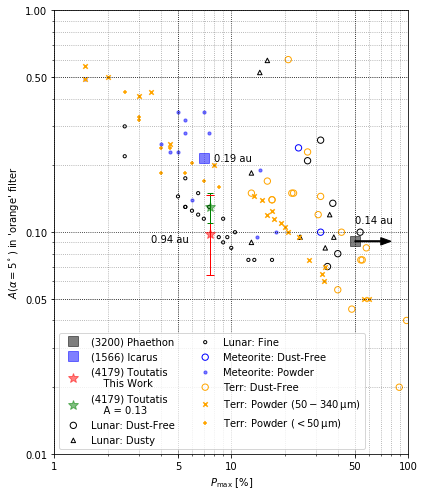

In [5]:
size = 40

markers = {"Lunar Dust-Free":
               dict(marker='o', s=size, edgecolors='k', facecolors='none',
                    label="Lunar: Dust-Free"),
           "Lunar Dusty":
               dict(marker='^', s=size/2, edgecolors='k', facecolors='none',
                    label="Lunar: Dusty"),
           "Lunar Fine":
               dict(marker='.', s=size, edgecolors='k', facecolors='none', 
                    label="Lunar: Fine"),
           "Meteorite Dust-Free":
               dict(marker='o', s=size, edgecolors='b', facecolors='none',
                    label="Meteorite: Dust-Free"),
           "Meteoritic Powder":
               dict(marker='.', s=size, c='b', alpha=0.5, 
                    label="Meteorite: Powder"),
           "Rock Dust-Free":
               dict(marker='o', s=size, edgecolors='orange', facecolors='none',
                    label="Terr: Dust-Free"),
           "Rock Powder 340":
               dict(marker='x', s=size/2, c='orange', 
                    label="Terr: Powder ($50 - 340 \,\mathrm{\mu m}$)"),
           "Rock Powder 50":
               dict(marker='+', s=size/2, c='orange',
                    label="Terr: Powder ($< 50 \,\mathrm{\mu m}$)")
           }

plt.close('all')
fig, ax = plt.subplots(1, 1, figsize=(6, 7))

for categ, group in dg_ptab:
    ax.scatter(group["Pmax"], group["A5"], **markers[categ])

ax.plot(50, 0.091, marker='s', color='k', ms=10,
        ls='', alpha=0.5, label="(3200) Phaethon")
ax.arrow(50, 0.091, dx=20, dy=0, head_width=0.007, head_length=10, fc='k', ec='k')
ax.text(50, 0.11, "0.14 au")

ax.plot(7.04, 0.215, marker='s', color='b', ms=10,
        ls='', alpha=0.5, label="(1566) Icarus")
ax.text(8, 0.21, "0.19 au")

ax.plot(7.6, 0.098, marker='*', color='r', ms=10,
        ls='', alpha=0.5, label="(4179) Toutatis\n    This Work")
ax.plot(7.6, 0.13, marker='*', color='g', ms=10,
        ls='', alpha=0.5, label="(4179) Toutatis\n    A = 0.13")
ax.errorbar(7.6, 0.098, yerr=[[0.034], [0.049]], marker=None, color='r', ms=10,
            ls='', elinewidth=1, capsize=4, label=None)
ax.errorbar(7.6, 0.13, yerr=[[0.02], [0.02]], marker=None, color='g', ms=10,
            ls='', elinewidth=1, capsize=3, label=None)
ax.text(3.5, 0.09, "0.94 au")


cosmetics(ax)
ax.legend(fontsize=10, ncol=2)

plt.tight_layout()
plt.show()